In [2]:
import pandas as pd
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
#Importing the necessary libraries using import

In [46]:
df = pd.read_csv("Fraud_check .csv")
df.head()
#creating a variable named df and assigning it to our data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
df.duplicated().sum()


0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


## After performing EDA on the data, we divide it into feature and target and assign a variable to both

In [6]:
X= df.drop(["Taxable.Income"], axis=1) #Feature
Y= pd.DataFrame(df["Taxable.Income"]) #Target


## coverting the data in the Y variable into Good, Risky based on the Taxable Income so the machine could produce better results

In [21]:
Y_ = Y<=30000
Y_new=pd.DataFrame(Y_.replace([False,True],['Good','Risky']))
print(Y_new)


    Taxable.Income
0             Good
1             Good
2             Good
3             Good
4             Good
..             ...
595           Good
596           Good
597           Good
598           Good
599           Good

[600 rows x 1 columns]


## Encoding the data, to know more about encoding, please check out my other uploads. :)

In [8]:
X_enc = pd.get_dummies(X)
X_enc.shape


(600, 9)

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y_enc = le.fit_transform(Y_new)
pd.DataFrame(Y_enc).head()


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0
0,0
1,0
2,0
3,0
4,0


## Scaling the data
### To know more about scaling, check out my repositary on scaling :)

In [23]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_scaled = ss.fit_transform(X_enc)


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled, Y_enc, test_size= 0.2, random_state=42)


In [34]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn import datasets  
#Importing necessary libraries to build a decision tree model 

In [35]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

print(model.tree_.max_depth)
model.score(x_test,y_test)

20


0.6583333333333333

# The model gives us a 65% accuracy, in complex machine learning models, we mention parameters for the model to take in and give us a prediction based off it, lets try to change them or apply Hyperparameter tuning on them.
#### Hyper parameter tuning helps us to give multiple values to each parameter and gives us the best set of parameters , basically the parameters that will give us the best accuracy


[Text(0.587600114416476, 0.9761904761904762, 'x[5] <= 0.378\ngini = 0.325\nsamples = 480\nvalue = [382, 98]'),
 Text(0.426487414187643, 0.9285714285714286, 'x[1] <= 1.578\ngini = 0.298\nsamples = 324\nvalue = [265, 59]'),
 Text(0.3197940503432494, 0.8809523809523809, 'x[1] <= 0.899\ngini = 0.287\nsamples = 311\nvalue = [257, 54]'),
 Text(0.15217391304347827, 0.8333333333333334, 'x[1] <= -1.025\ngini = 0.316\nsamples = 244\nvalue = [196, 48]'),
 Text(0.08695652173913043, 0.7857142857142857, 'x[0] <= 1.245\ngini = 0.222\nsamples = 63\nvalue = [55, 8]'),
 Text(0.05491990846681922, 0.7380952380952381, 'x[0] <= -0.013\ngini = 0.163\nsamples = 56\nvalue = [51, 5]'),
 Text(0.036613272311212815, 0.6904761904761905, 'x[1] <= -1.591\ngini = 0.062\nsamples = 31\nvalue = [30, 1]'),
 Text(0.02745995423340961, 0.6428571428571429, 'x[0] <= -0.642\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.018306636155606407, 0.5952380952380952, 'x[0] <= -1.061\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),


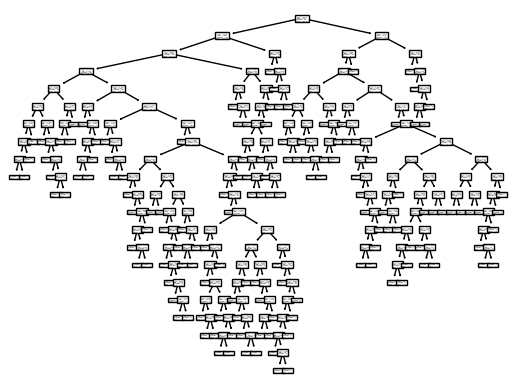

In [38]:
tree.plot_tree(model)

In [39]:
#Using a different criterion and applying hyperparameter tuning again
from sklearn.model_selection import GridSearchCV

params_grid = [{"criterion": ["gini"],"max_depth": range(10,13),"max_features":range(1,4,3), "max_leaf_nodes":range(2,50,100)}]

gsv = GridSearchCV(model, params_grid)

gsv.fit(x_train,y_train)


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini'], 'max_depth': range(10, 13),
                          'max_features': range(1, 4, 3),
                          'max_leaf_nodes': range(2, 50, 100)}])

In [40]:
gsv.best_params_ , gsv.best_score_


({'criterion': 'gini',
  'max_depth': 10,
  'max_features': 1,
  'max_leaf_nodes': 2},
 0.7958333333333333)

In [41]:
params_grid = [{"criterion": ["entropy"],"max_depth": range(1,4,3)}]
gsv = GridSearchCV(model, params_grid)

gsv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['entropy'],
                          'max_depth': range(1, 4, 3)}])

In [42]:

gsv.best_params_ , gsv.best_score_

({'criterion': 'entropy', 'max_depth': 1}, 0.79375)

In [43]:
#Conclusion : Best score obtained by criterion gini

In [44]:
model= DecisionTreeClassifier(criterion = "gini",max_depth = 5, max_leaf_nodes = 2, max_features = 1)
model.fit(x_train,y_train)
model.score(x_test,y_test)


0.7833333333333333

[Text(0.5, 0.75, 'x[3] <= -0.04\ngini = 0.325\nsamples = 480\nvalue = [382, 98]'),
 Text(0.25, 0.25, 'gini = 0.306\nsamples = 228\nvalue = [185, 43]'),
 Text(0.75, 0.25, 'gini = 0.341\nsamples = 252\nvalue = [197, 55]')]

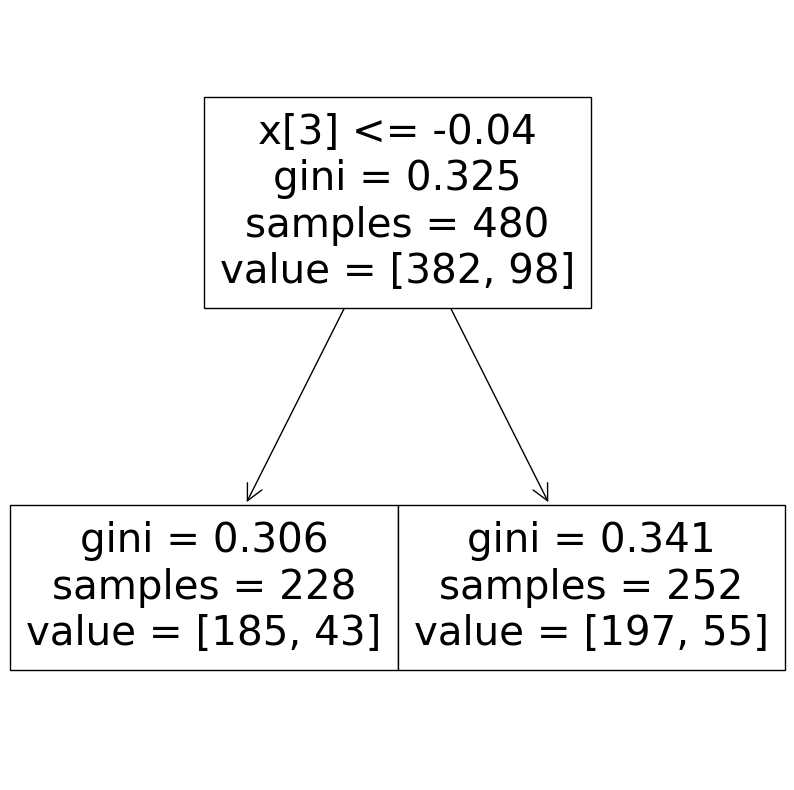

In [45]:
plt.figure(figsize=(10,10))
tree.plot_tree(model)
